In [97]:
# importation de la dataset 
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


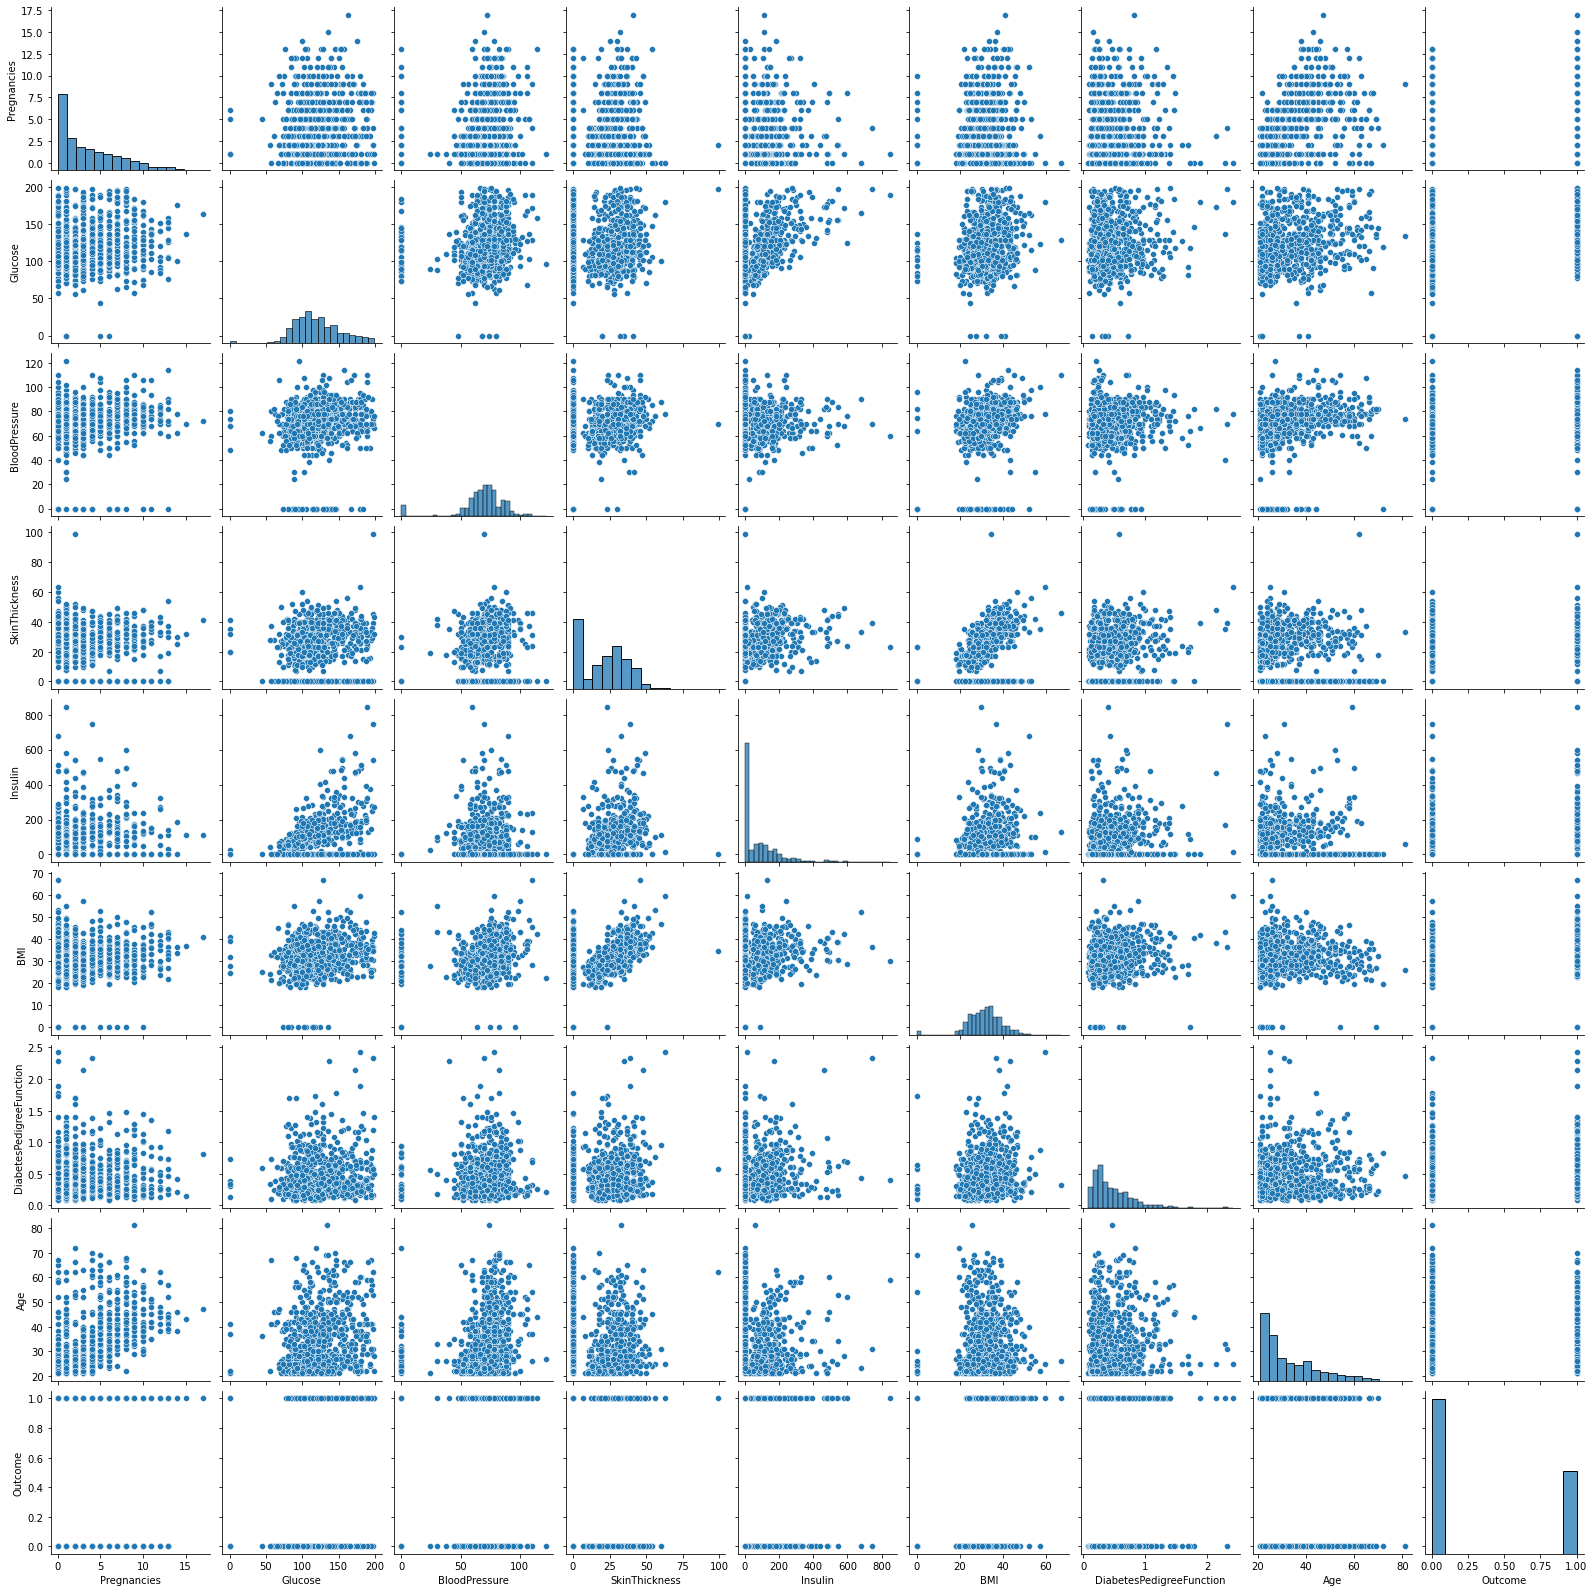

In [48]:
import seaborn as sns
sns.pairplot(data)

In [98]:
V=data.values

In [99]:
print(V)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [103]:
X1a8=V[:,1:3]
y=V[:,8]
scaler = StandardScaler()
scaler.fit(X1a8)
X=scaler.transform(X1a8)

In [104]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X_train,  X_test,  y_train,  y_test  =  train_test_split(X1a8,  y,  train_size=0.7, random_state=0)

from sklearn import svm, datasets 
C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)
print('le score est : ',lin_svc.score(X_test, y_test))

le score est :  0.3203463203463203


C:\Users\Youva TIZZAOUI\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'LinearSVC')

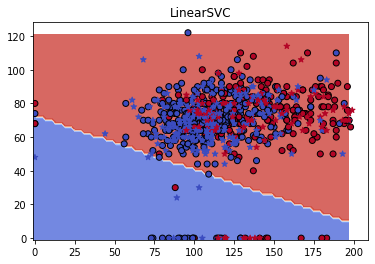

In [105]:
# Créer la surface de décision discretisée
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k',
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.title("LinearSVC")

C:\Users\Youva TIZZAOUI\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Youva TIZZAOUI\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Youva TIZZAOUI\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Youva TIZZAOUI\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


valeur de C : 1
le score est :  0.35064935064935066
valeur de C : 30
le score est :  0.3463203463203463
valeur de C : 60
le score est :  0.6796536796536796
valeur de C : 90
le score est :  0.6796536796536796
valeur de C : 110
le score est :  0.6796536796536796


C:\Users\Youva TIZZAOUI\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


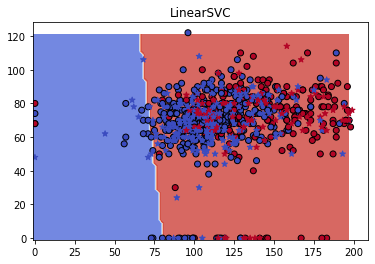

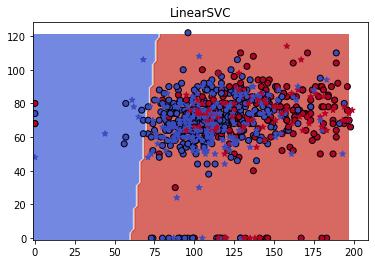

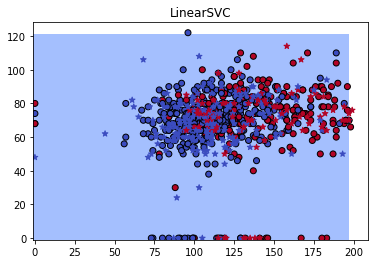

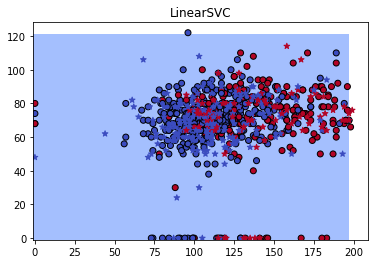

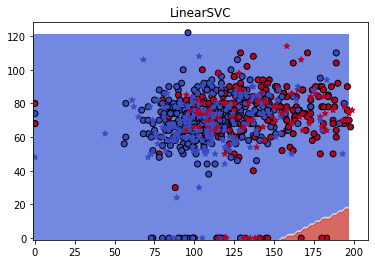

In [106]:
from sklearn.svm import SVC
C = [1,30,60,90,110]
for C in C :
    lin_svc = svm.LinearSVC(C=C)
    lin_svc.fit(X_train, y_train)
    lin_svc.score(X_train, y_train)

    plt.figure(C)
    print('valeur de C :', C)
    print('le score est : ',lin_svc.score(X_test, y_test))
     # Créer la surface de décision discretisée 
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 
    # Pour afficher la surface de décision on va discrétiser l'espace avec un 
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100) 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

    # Surface de décision 
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) 
    # Afficher aussi les points d'apprentissage 
    plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k',
    c=y_train, cmap=plt.cm.coolwarm) 
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
    cmap=plt.cm.coolwarm) 
    plt.title("LinearSVC")

In [108]:
from sklearn.model_selection import GridSearchCV

parameters = { 'kernel':['linear', 'rbf'], 'C':[1, 30,60,90,110], 'gamma' :[0.5,0.1,0.001,0.00001,10] }

grid = GridSearchCV(SVC(), parameters, cv = 5 )
grid.fit(X_train,y_train)
print(grid.best_params_,grid.best_estimator_)

KeyboardInterrupt: 

In [55]:
lin_svc = svm.LinearSVC(C=110, loss = 'hinge', random_state=0)
lin_svc.fit(X_train, y_train)
#lin_svc.score(X_train, y_train)
print('le score est : ',lin_svc.score(X_train, y_train))

le score est :  0.7523277467411545


C:\Users\Youva TIZZAOUI\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Afficher aussi les points d'apprentissage 
plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k', c=y_train, cmap=plt.cm.coolwarm) 
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm) 
grid.best_params_
grid.score(X_train, y_train)

In [ ]:
parameters = { 'kernel':['rbf' ], 'C':[1, 30,60,90,110], 'gamma' :[0.5,0.01,0.00001] }


grid = GridSearchCV(SVC(), parameters, cv = 5 )
grid.fit(X_train,y_train)


lin_svc = svm.LinearSVC(C=C, loss = 'hinge', random_state=0)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_train, y_train)


# Afficher aussi les points d'apprentissage 
plt.figure(2)
plt.scatter(X_train[:,  0],  X_train[:,  1],  label="train",  edgecolors='k', c=y_train, cmap=plt.cm.coolwarm) 
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm)  
plt.title("LinearSVC")



In [ ]:
C=1.0
lin_svc = svm.LinearSVC(C=C,random_state=0).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C,random_state=0).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()
lin_svc.score(X_test, y_test)
svc.score(X_test, y_test)
print(' le score est ', lin_svc.score(X_train, y_train))